## Josh Cubero
## Assignment 3
## DS-630

# Task 1 Visualization
1. For both tasks, you should look at the plots before making use of the ground truth labels.
2. For your submission, use the ground truth labels to color the points in all scatter plots.
3. Visualize the univariate distributions of all features, jointly and per class.
4. Visualize the data using PCA (first two principal components).
5. Plot the explained variance ratio in PCA. What would be a good threshold for the number of principal components if you wanted to reduce the dimensionality of the data to compress it?
6. Visualize the data using t-SNE. See if tuning the perplexity parameter helps obtaining a better visualization.
# Task 2 Clustering
1. Use KMeans
2. Agglomerative Clustering (with ward linkage) and 
3. DBSCAN to cluster the data. 
4. For each algorithm, try to manually tune the parameters for a reasonable outcome and document how you tuned the parameters. In particular pay attention to the sizes of the clusters created. Create a dendrogram for agglomerative clustering (the truncate_mode='level' might be useful).
5. Manually inspect the outcomes as good as you can and identify if any of the resulting clusters are meaningful (as far as you can tell).
6. Use the known ground truth labels of the outlier vs inlier class to evaluate your clustering approaches using NMI and ARI scores. 
7. How well did they do? Can you adjust parameters so they can detect the outliers better?
# Task 3 Outlier Detection
1. Assume that you know the proportion of outliers. Use EllipticEnvelope, 
2. OneClassSVM and 
3. IsolationForest to detect outliers. 
4. Without using the ground-truth, can you tell which one gave the best results? Why?
5. Use the ground-truth to evaluate the different outlier detection approaches using AUC and average precision. 
6. How can you compare their quality to the clustering approaches from Task 2?
# Task 4 Imbalanced Classification
1. Treat the problem as an imbalanced classification problem using LogisticRegression 
2. RandomForestClassifier. 
3. Compare your results with the outlier detection in terms of AUC 
4. Average precision. 
5. Tune C and a regularization mechanism for the random forest. 
6. Does changing the class-weight to “balanced” help?

In [305]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

In [252]:
train_data = pd.read_csv('ann-train.data', sep=" ", header=None)
train_data.columns = train_data.columns.astype(str)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0.00060,0.015,0.120,0.082,0.146,3,NaN,NaN
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.030,0.143,0.133,0.108,3,NaN,NaN
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0.00190,0.024,0.102,0.131,0.078,3,NaN,NaN
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0.00090,0.017,0.077,0.090,0.085,3,NaN,NaN
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.026,0.139,0.090,0.153,3,NaN,NaN


In [253]:
train_data.drop(['22','23'], axis=1, inplace=True)

In [254]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3772 non-null   float64
 1   1       3772 non-null   int64  
 2   2       3772 non-null   int64  
 3   3       3772 non-null   int64  
 4   4       3772 non-null   int64  
 5   5       3772 non-null   int64  
 6   6       3772 non-null   int64  
 7   7       3772 non-null   int64  
 8   8       3772 non-null   int64  
 9   9       3772 non-null   int64  
 10  10      3772 non-null   int64  
 11  11      3772 non-null   int64  
 12  12      3772 non-null   int64  
 13  13      3772 non-null   int64  
 14  14      3772 non-null   int64  
 15  15      3772 non-null   int64  
 16  16      3772 non-null   float64
 17  17      3772 non-null   float64
 18  18      3772 non-null   float64
 19  19      3772 non-null   float64
 20  20      3772 non-null   float64
 21  21      3772 non-null   int64  
dtype

In [225]:
train_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')

# # Task 1 Visualization

### Visualize the univariate distributions of all features, jointly and per class.

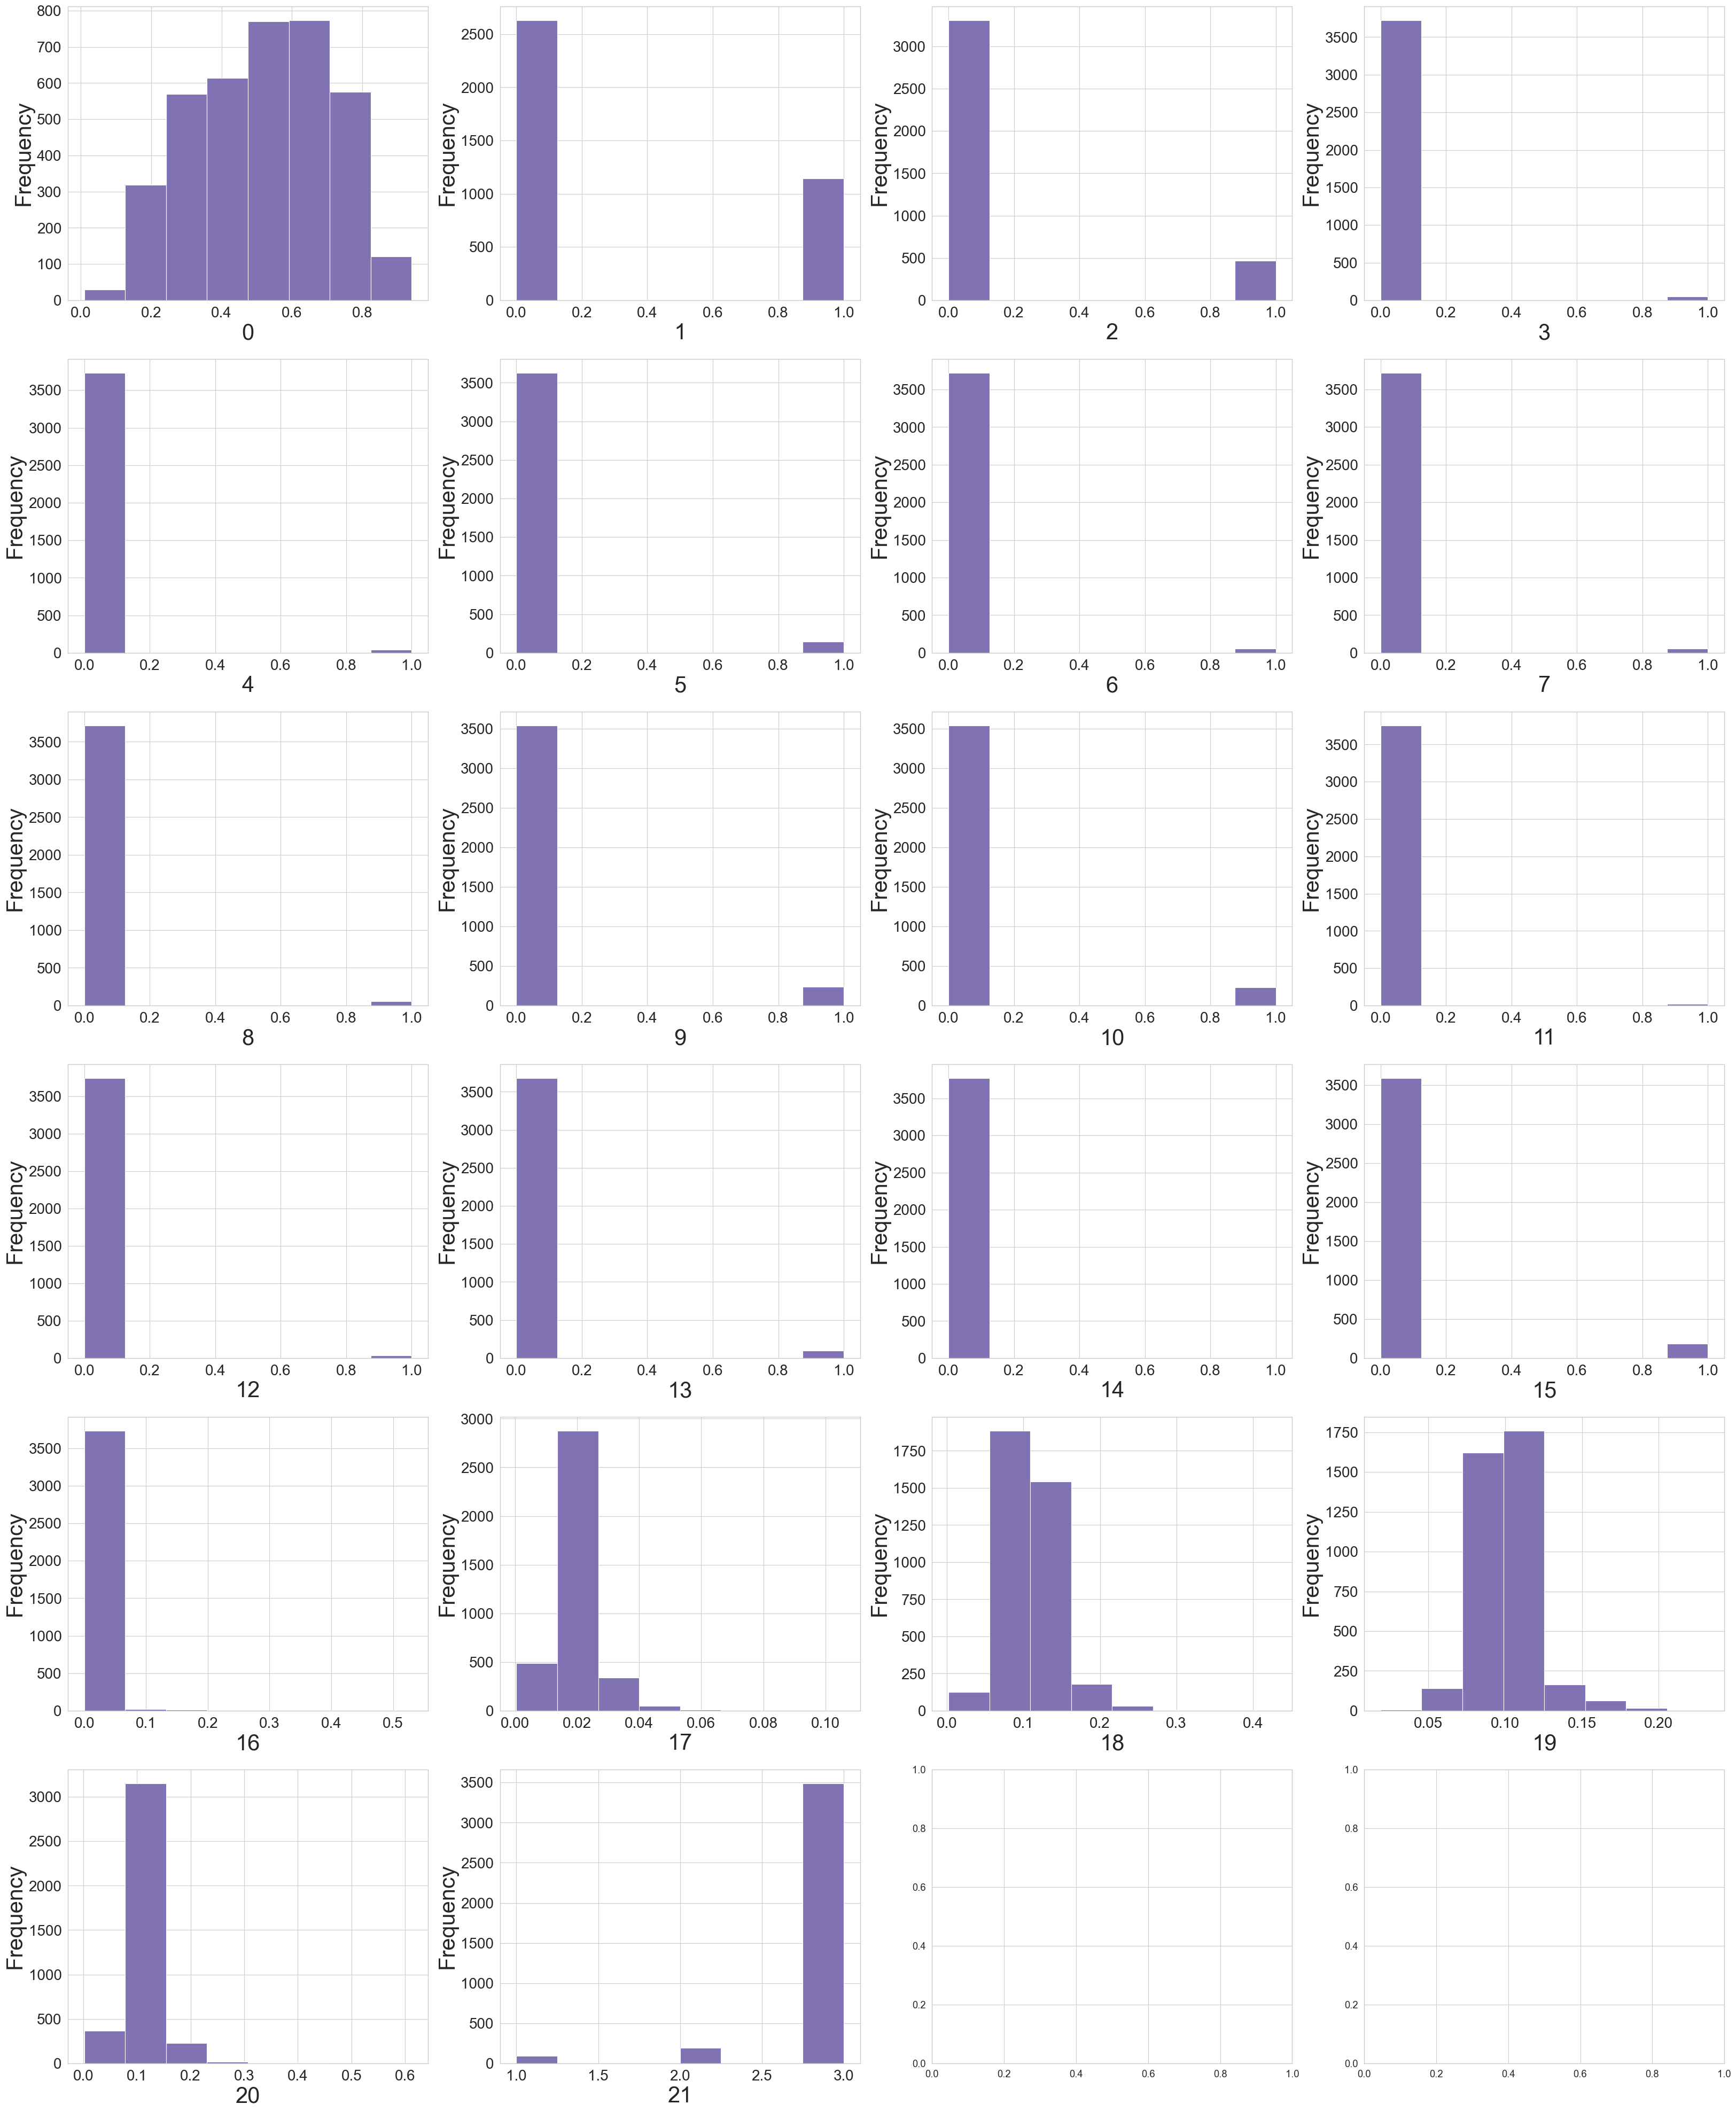

In [226]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(40, 50))    
axes = axes.flatten()
for i, col in enumerate(train_data.columns):
    train_data[col].hist(ax=axes[i], color='m', bins=8)
    axes[i].set_xlabel(col, fontsize=30)
    axes[i].set_ylabel('Frequency', fontsize=30)
    axes[i].tick_params(axis='x', labelsize=20)  
    axes[i].tick_params(axis='y', labelsize=20)
plt.show()

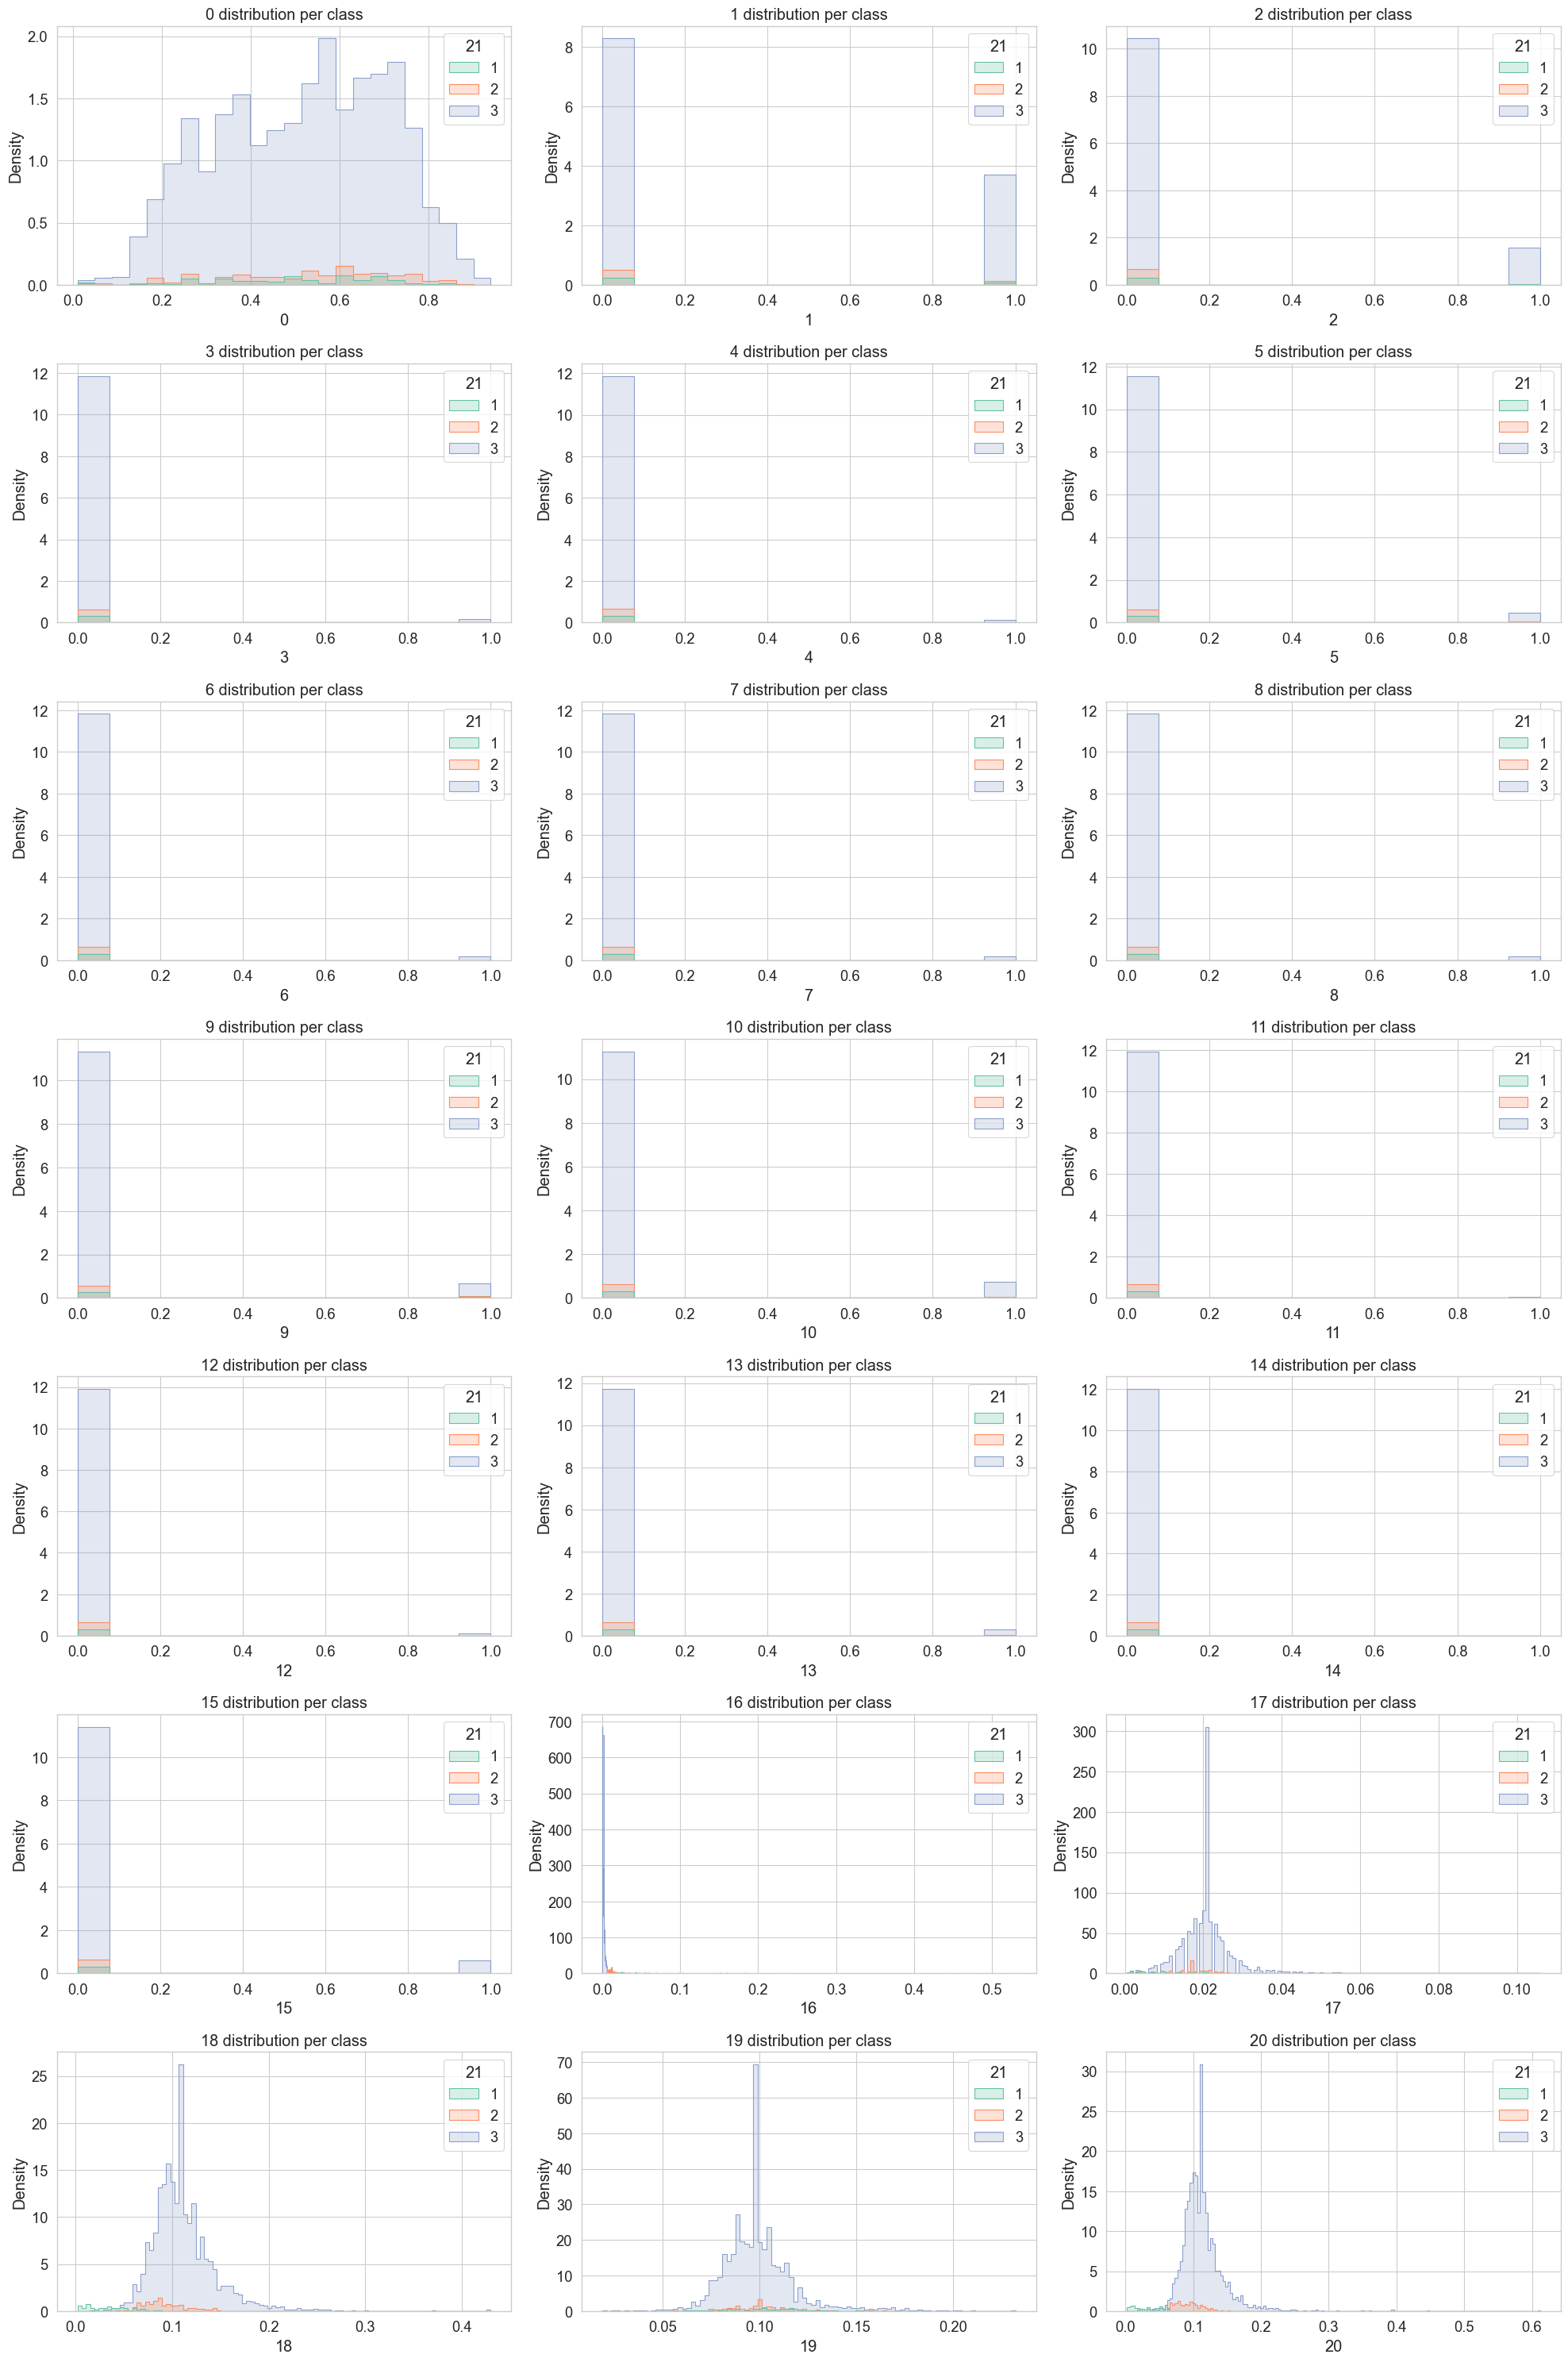

In [227]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 30))
sns.set_context("paper", font_scale=1.5)
for i, feature in enumerate(train_data.columns[:-1]):
    plt.subplot(7, 3, i + 1)
    sns.histplot(data=train_data, x=feature, hue='21', element='step', stat='density', palette='Set2')
    plt.title(f'{feature} distribution per class')

plt.tight_layout()
plt.show()

In [255]:
X = train_data.drop('21', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3772 non-null   float64
 1   1       3772 non-null   int64  
 2   2       3772 non-null   int64  
 3   3       3772 non-null   int64  
 4   4       3772 non-null   int64  
 5   5       3772 non-null   int64  
 6   6       3772 non-null   int64  
 7   7       3772 non-null   int64  
 8   8       3772 non-null   int64  
 9   9       3772 non-null   int64  
 10  10      3772 non-null   int64  
 11  11      3772 non-null   int64  
 12  12      3772 non-null   int64  
 13  13      3772 non-null   int64  
 14  14      3772 non-null   int64  
 15  15      3772 non-null   int64  
 16  16      3772 non-null   float64
 17  17      3772 non-null   float64
 18  18      3772 non-null   float64
 19  19      3772 non-null   float64
 20  20      3772 non-null   float64
dtypes: float64(6), int64(15)
memory usage

In [256]:
from sklearn.decomposition import PCA
pca = PCA()
components = pca.fit_transform(X)

In [257]:
components.shape

(3772, 21)

In [258]:
pca_df = pd.DataFrame(data = components
             , columns = X.columns)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.428342,0.840633,-0.075029,-0.124564,-0.085373,0.103845,-0.248123,-0.025992,0.919201,-0.194227,...,-0.009907,-0.015467,0.007020,0.003444,0.017632,-0.021839,0.016780,0.001296,-0.002625,0.001791
1,-0.279042,-0.171536,-0.085089,-0.050258,0.062922,-0.166991,0.199567,-0.063415,0.010293,-0.008006,...,-0.019315,-0.016045,-0.021409,-0.009615,0.028864,0.028376,-0.023000,-0.000970,0.002924,0.001093
2,-0.278087,-0.166989,-0.088730,-0.020434,-0.026228,-0.073636,0.016251,-0.039587,-0.006697,-0.007167,...,-0.004969,-0.010024,-0.012702,-0.005580,-0.022322,0.022768,-0.027920,-0.001040,0.004919,0.006915
3,0.707948,-0.016034,-0.025081,-0.010581,-0.127789,-0.021030,-0.103151,0.006704,-0.016742,-0.003762,...,0.022969,-0.006672,-0.007514,-0.001735,-0.028808,-0.004302,-0.007376,-0.000771,0.000136,-0.001132
4,-0.278839,-0.171095,-0.084879,-0.051766,0.066532,-0.170238,0.206280,-0.064858,0.010733,-0.007629,...,-0.021553,-0.016091,-0.022550,-0.010759,0.055238,-0.013234,0.015371,0.000454,0.000887,-0.002200


In [259]:
pca_df['target'] = train_data['21']
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,target
0,-0.428342,0.840633,-0.075029,-0.124564,-0.085373,0.103845,-0.248123,-0.025992,0.919201,-0.194227,...,-0.015467,0.007020,0.003444,0.017632,-0.021839,0.016780,0.001296,-0.002625,0.001791,3
1,-0.279042,-0.171536,-0.085089,-0.050258,0.062922,-0.166991,0.199567,-0.063415,0.010293,-0.008006,...,-0.016045,-0.021409,-0.009615,0.028864,0.028376,-0.023000,-0.000970,0.002924,0.001093,3
2,-0.278087,-0.166989,-0.088730,-0.020434,-0.026228,-0.073636,0.016251,-0.039587,-0.006697,-0.007167,...,-0.010024,-0.012702,-0.005580,-0.022322,0.022768,-0.027920,-0.001040,0.004919,0.006915,3
3,0.707948,-0.016034,-0.025081,-0.010581,-0.127789,-0.021030,-0.103151,0.006704,-0.016742,-0.003762,...,-0.006672,-0.007514,-0.001735,-0.028808,-0.004302,-0.007376,-0.000771,0.000136,-0.001132,3
4,-0.278839,-0.171095,-0.084879,-0.051766,0.066532,-0.170238,0.206280,-0.064858,0.010733,-0.007629,...,-0.016091,-0.022550,-0.010759,0.055238,-0.013234,0.015371,0.000454,0.000887,-0.002200,3


### Visualize the data using PCA (first two principal components).

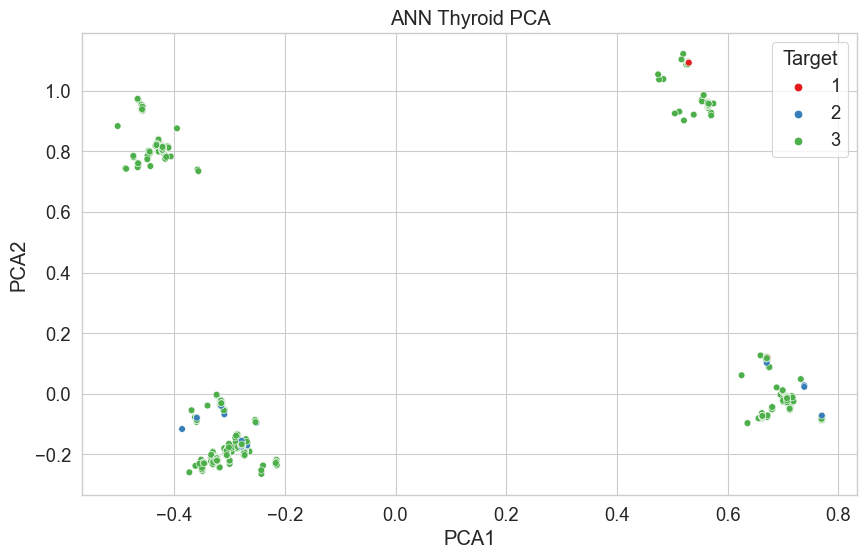

In [260]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='0', y='1', hue='target', palette='Set1')
plt.title('ANN Thyroid PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Target', loc='upper right')
plt.show()

In [261]:
train_data['21'].value_counts()

21
3    3488
2     191
1      93
Name: count, dtype: int64

In [262]:
pca.explained_variance_ratio_

array([3.23689473e-01, 1.62191226e-01, 8.89478216e-02, 8.62809706e-02,
       7.22276393e-02, 5.60144948e-02, 4.99650998e-02, 3.68961969e-02,
       2.20764718e-02, 2.13518098e-02, 2.01842222e-02, 1.85966180e-02,
       1.61922117e-02, 1.29718441e-02, 7.52707343e-03, 2.95008608e-03,
       7.82339184e-04, 6.72785556e-04, 3.90222290e-04, 5.48882293e-05,
       3.65062057e-05])

In [263]:
pca_evr = pca.explained_variance_ratio_
np_pca_evr = np.cumsum(pca_evr)

### Plot the explained variance ratio in PCA. 

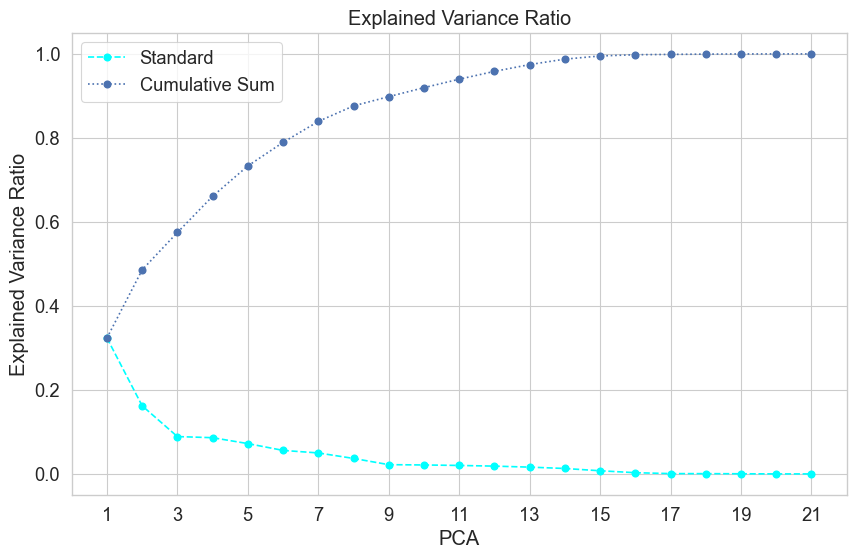

In [264]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,22), pca_evr, marker='o', color='cyan', label = 'Standard', linestyle='dashed')
plt.plot(range(1,22), np_pca_evr, label = 'Cumulative Sum', linestyle='dotted',marker='o')
plt.xlabel('PCA')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.xticks(range(1, 22, 2))
plt.legend()
plt.grid(True)
plt.show()

In [265]:
threshold = 0.95
n_components = np.argmax(np_pca_evr >= threshold) 
print(f'Number of components to retain {n_components} to explain at least {threshold*100}% of the variance.')

Number of components to retain 11 to explain at least 95.0% of the variance.


In [58]:
"""tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)"""

'tsne = TSNE(n_components=2)\ntsne_data = tsne.fit_transform(X)'

In [56]:
"""df_tsne = pd.DataFrame(data=tsne_data, columns=['tsne_0','tsne_1'])
df_tsne.head()"""

"df_tsne = pd.DataFrame(data=tsne_data, columns=['tsne_0','tsne_1'])\ndf_tsne.head()"

In [57]:
"""sns.scatterplot(data=df_tsne, x='tsne_0', y='tsne_1', hue=train_data[21])
plt.show()"""

"sns.scatterplot(data=df_tsne, x='tsne_0', y='tsne_1', hue=train_data[21])\nplt.show()"

In [55]:
"""tsne2 = TSNE(n_components=2,perplexity= 50)
tsne_data2 = tsne2.fit_transform(X)
df_tsne2 = pd.DataFrame(data=tsne_data2, columns=['tsne_0','tsne_1'])
sns.scatterplot(data=df_tsne2, x='tsne_0', y='tsne_1', hue=train_data[21])
plt.show()"""

"tsne2 = TSNE(n_components=2,perplexity= 50)\ntsne_data2 = tsne2.fit_transform(X)\ndf_tsne2 = pd.DataFrame(data=tsne_data2, columns=['tsne_0','tsne_1'])\nsns.scatterplot(data=df_tsne2, x='tsne_0', y='tsne_1', hue=train_data[21])\nplt.show()"

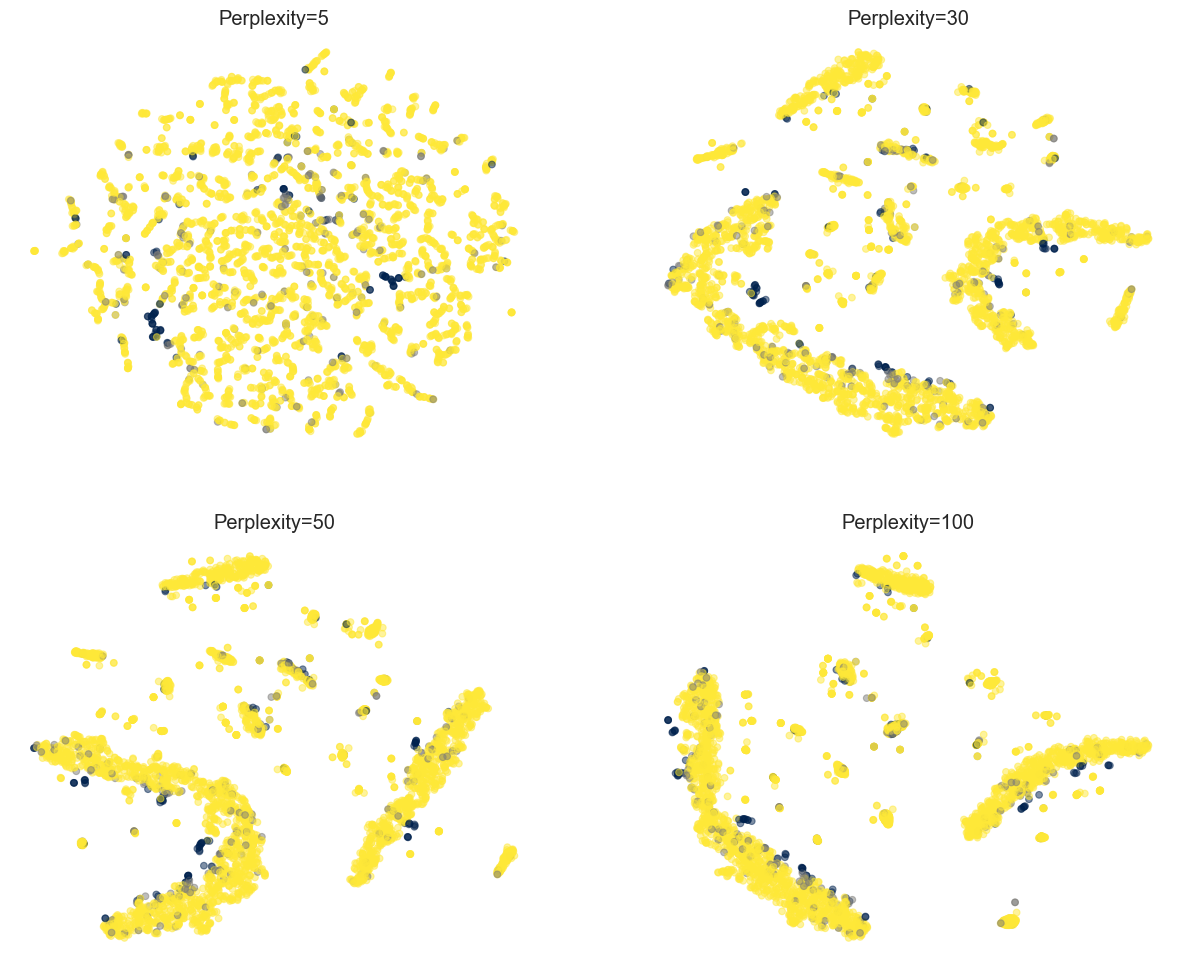

In [266]:
perps = [5, 30, 50, 100]
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(15, 12))
for i, p in enumerate(perps):
    tsne = TSNE(n_components=2, perplexity=p)
    Y = tsne.fit_transform(X)          
    row = i // 2  
    col = i % 2   
    axs[row, col].scatter(Y[:, 0], Y[:, 1], c=train_data['21'], cmap='cividis',alpha=0.5)
    axs[row, col].set_title(f'Perplexity={p}')
    axs[row, col].axis('off')
plt.show()


In [267]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

### KMeans Clustering 

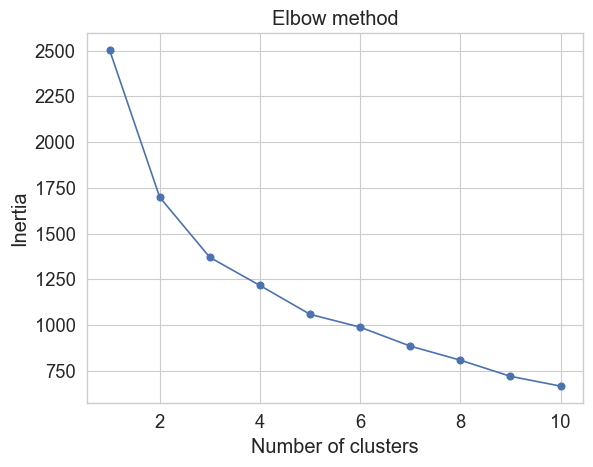

In [268]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

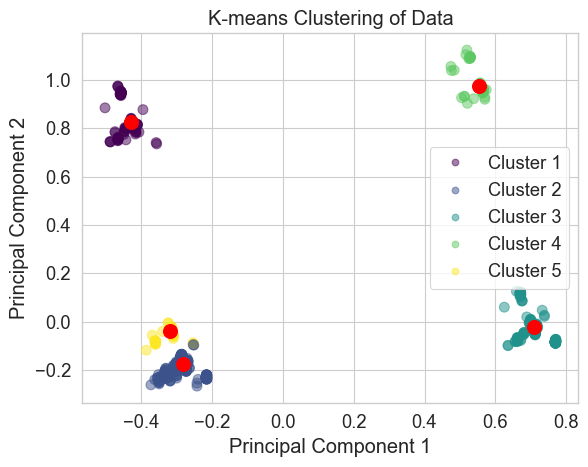

In [269]:

kmeans = KMeans(n_clusters=5, n_init=4)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)
centers = kmeans.cluster_centers_

scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_kmeans, cmap='viridis', label='Cluster', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label = 'Centroids')
plt.title('K-means Clustering of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Centroids'])
plt.show()
plt.show()

In [270]:
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

### Agglomerative Clustering 

In [271]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average', 'single'],
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}

agglo = AgglomerativeClustering()

grid_search = GridSearchCV(agglo, param_grid, cv=3, scoring='accuracy')
grid_search.fit(train_data)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2}
Best Score: nan


In [272]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(pca_data) 

pca_df['AggloCluster'] = agglo_labels
#print(pca_df.head(), agglo_counts)

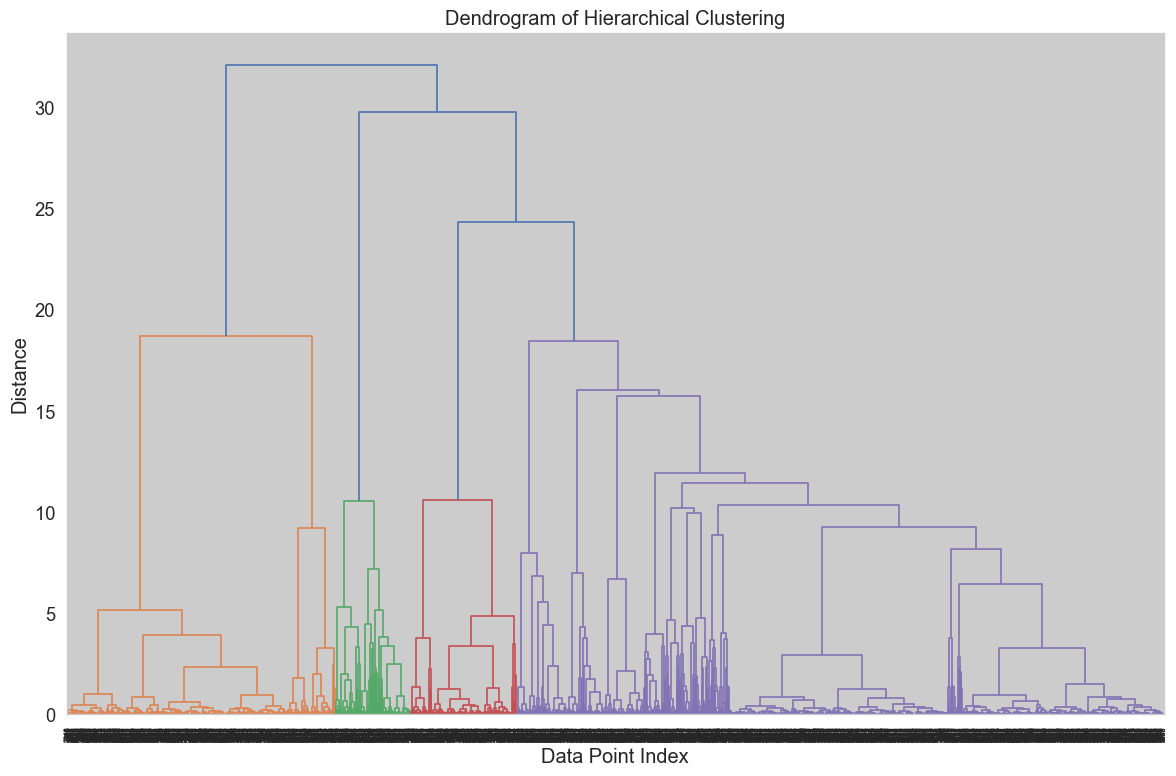

In [273]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(train_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix,truncate_mode='level')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.tight_layout()
plt.show()

### DBSCAN 

In [274]:
from sklearn.cluster import DBSCAN
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5],
    'min_samples': [5, 10, 15, 20]
}
dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, scoring='accuracy')
grid_search.fit(X)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'eps': 0.1, 'min_samples': 5}


In [275]:
dbscan = DBSCAN(eps=0.1, min_samples=5)  
dbscan_labels = dbscan.fit_predict(pca_data)
dbscan_labels.shape

(3772,)

In [276]:
pca_df['DBSCAN'] = dbscan_labels

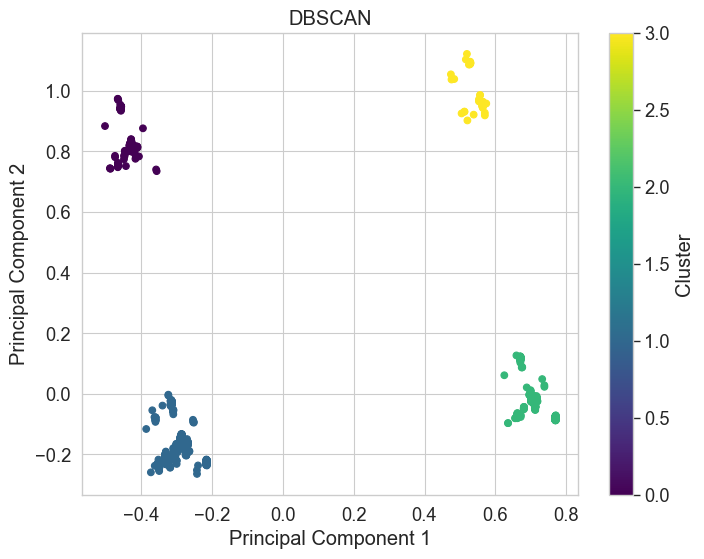

In [277]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_df['DBSCAN'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN')
plt.colorbar(label='Cluster')
plt.show()


In [278]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
ground_truth_labels = train_data['21']
cluster_labels = agglo_labels 

nmi_score = normalized_mutual_info_score(ground_truth_labels, cluster_labels)
ari_score = adjusted_rand_score(ground_truth_labels, cluster_labels)

print("NMI Score:", nmi_score)
print("ARI Score:", ari_score)

NMI Score: 0.001802549525995794
ARI Score: -0.01660194688697902


# Task 3 Outlier Detection

### EllipticEnvelope

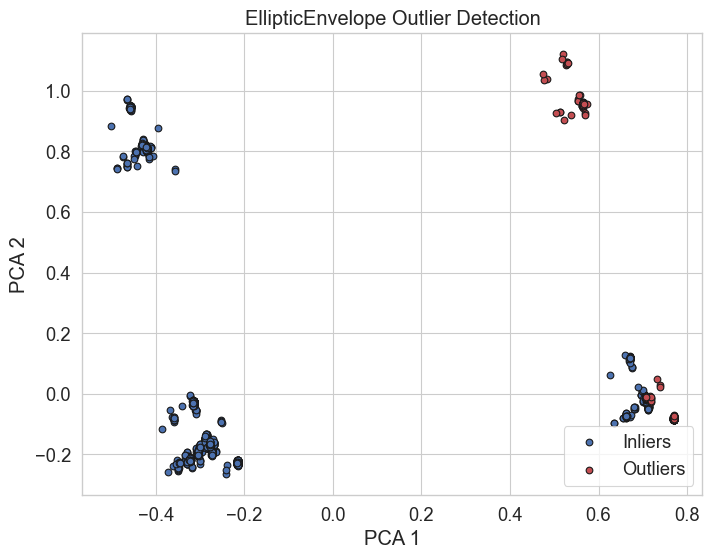

In [279]:
from sklearn.covariance import EllipticEnvelope
envelope = EllipticEnvelope(contamination=0.1) 
envelope.fit(pca_data)
anomaly_scores = envelope.decision_function(pca_data)
threshold = np.percentile(anomaly_scores, 100 * 0.1) 
outliers = pca_data[anomaly_scores < threshold]
inliers = pca_data[anomaly_scores >= threshold]
plt.figure(figsize=(8, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='b', label='Inliers', edgecolors='k')
plt.scatter(outliers[:, 0], outliers[:, 1], c='r', label='Outliers', edgecolors='k')
plt.legend()
plt.title('EllipticEnvelope Outlier Detection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [280]:
from sklearn.metrics import roc_auc_score, average_precision_score
auc = roc_auc_score(train_data['21'] != 1, -anomaly_scores, multi_class='ovo', average='macro')  
average_precision = average_precision_score(train_data['21'] != 1, -anomaly_scores, average='macro')
print(f"AUC: {auc}")
print(f"Average Precision: {average_precision}")

AUC: 0.5328294563447875
Average Precision: 0.9771902464500654


### OneClassSVM

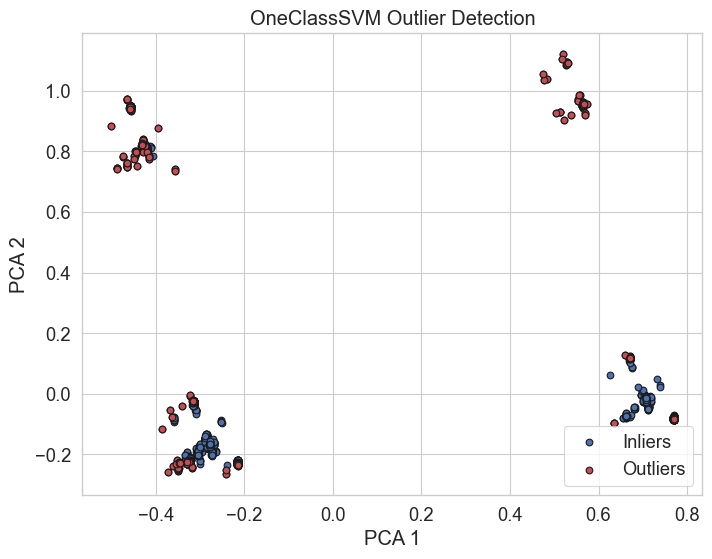

In [281]:
svm = OneClassSVM(nu=0.1)  
svm.fit(pca_data)
anomaly_scores = svm.decision_function(pca_data)
outliers = pca_data[anomaly_scores < 0]
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='b', label='Inliers', edgecolors='k')
plt.scatter(outliers[:, 0], outliers[:, 1], c='r', label='Outliers', edgecolors='k')
plt.legend()
plt.title('OneClassSVM Outlier Detection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [282]:
auc = roc_auc_score(train_data['21'] != 1, -anomaly_scores, multi_class='ovo', average='macro')  
average_precision = average_precision_score(train_data['21'] != 1, -anomaly_scores, average='macro')

print(f"AUC: {auc}")
print(f"Average Precision: {average_precision}")

AUC: 0.47471408488164446
Average Precision: 0.9755146825618441


### IsolationForest

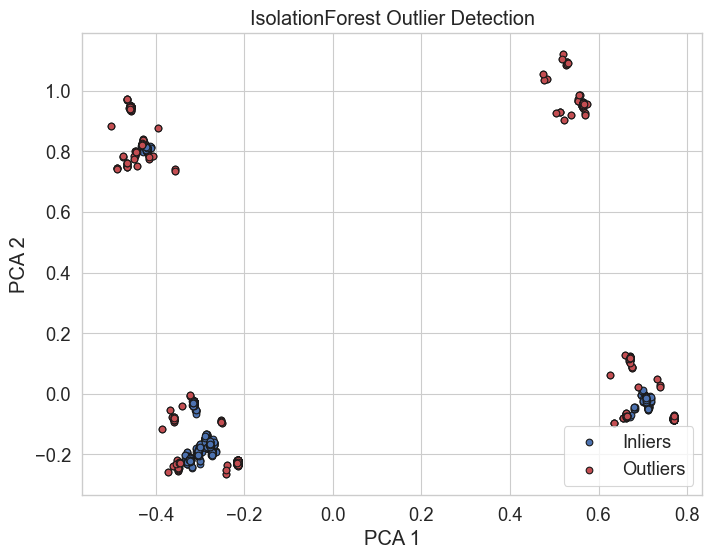

In [283]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(pca_data)

predicted_labels = isolation_forest.predict(pca_data)

outliers = pca_data[predicted_labels == -1]

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='b', label='Inliers', edgecolors='k')
plt.scatter(outliers[:, 0], outliers[:, 1], c='r', label='Outliers', edgecolors='k')
plt.legend()
plt.title('IsolationForest Outlier Detection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [299]:
# from sklearn.metrics import roc_auc_score, average_precision_score

# Calculate AUC for each class
auc_scores = []
ap_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (train_data['21'] == class_label).astype(int)
    auc = roc_auc_score(binary_labels, prob_scores)  # No need for indexing, as prob_scores is already 1D
    ap = average_precision_score(binary_labels, prob_scores)
    auc_scores.append(auc)
    ap_scores.append(ap)

# Average the AUC scores
auc = np.mean(auc_scores)
average_precision = np.mean(ap_scores)

print(f"AUC: {auc}")
print(f"Average Precision: {average_precision}")


AUC: 0.49477003208888054
Average Precision: 0.33515691656614016


### Without using the ground-truth, can you tell which one gave the best results? Why? 

For this task, in the absence of ground truth, I chose to visually depict the inliers and outliers using scatter plots for each outlier detection method. As I observed each scatter plot, I noticed that both OneClassSVM and IsolationForest have four clusters where inliers and outliers are overlapping. This suggests that these models may not be performing well, as indicated by the overlapping inliers and outliers. However, the scatter plot for Elliptic Envelope shows that two of the four clusters have no overlap, indicating better performance for this method.

### Use the ground-truth to evaluate the different outlier detection approaches using AUC and average precision. How can you compare their quality to the clustering approaches from Task 2?

Using the ground truth labels, with AUC and Average Precision yielded confirming results as follows:

Elliptic Envelope
AUC: 0.5328294563447875
Average Precision: 0.9771902464500654

OneClassSVM
AUC: 0.47471408488164446
Average Precision: 0.9755146825618441

IsolationForest
AUC: 0.49477003208888054
Average Precision: 0.33515691656614016

Visually inspecting the scatterplots of all three models, we can see that the order of best performance as Elliptic Envelope, OneClassSVM, and Isolation Forect. Then, when implementing the ground truth labels, we see that Elliptic Envelope still outperforms OneClassSVM and IsolationForest.

### Threat the problem as an imbalanced classification problem using LogisticRegression  

In [304]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, train_data['21'], test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', random_state=42)
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
auc_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    auc = roc_auc_score(binary_labels, y_pred_proba[:, class_label - 1])
    auc_scores.append(auc)
auc = np.mean(auc_scores)
print(f"AUC: {auc}")
ap_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    ap = average_precision_score(binary_labels, y_pred_proba[:, class_label - 1])
    ap_scores.append(ap)
average_precision = np.mean(ap_scores)
print(f"Average Precision: {average_precision}")

AUC: 0.5369494606985611
Average Precision: 0.3466766470190012


### Imbalanced RandomForestClassifier

In [306]:
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_proba = rf_classifier.predict_proba(X_test)
auc_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    auc = roc_auc_score(binary_labels, y_pred_proba[:, class_label - 1])
    auc_scores.append(auc)
auc = np.mean(auc_scores)
print(f"AUC: {auc}")
ap_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    ap = average_precision_score(binary_labels, y_pred_proba[:, class_label - 1])
    ap_scores.append(ap)
average_precision = np.mean(ap_scores)
print(f"Average Precision: {average_precision}")

AUC: 0.7265310978777261
Average Precision: 0.5002544965459901


###  Compare your results with the outlier detection in terms of AUC and Average precision.

In this situation, I'll compare EllipticEnvelope to LR and RFC since EE performed the best of the first three models. The comparisons are as follows:

Random Forest Classifier: 
AUC - 0.7265
Average Precision - 0.5003
This model has the highest AUC, inidicative of good performance in differentiating between positive and negative classes.
The avg precision performs moderately well which suggests that the model is effective at retrieving relevant instances but may contain some false positives.

Logistic Regression: 
AUC - 0.5369 
Average Precision - 0.3467
The AUC for LR is lower than EE and RFC, which indicated poor performance in differentiating between classes.
Additionally, avg precision is low, which suggests the model might be less effective at retrieving relevant instances and will display more false positives.

Elliptic Envelope: 
AUC - 0.5328
Average Precision - 0.9772
EE return the lowest AUC compared to RFC and LR which indicates poor performance in class separation. However, EE has the highest average precision, which suggests that it is highly effective at retrieving relevant instances and has few false positives.

When comparing these three models, RFC would appear to have the best all-around performance. It has a good balance between AUC and average precision, which indicates the best overall performance in both class separation and retrieval of relevant instances. EE has the highest average precision, however its low AUC indicates that it may not be as effective in distinguishing between classes. LR performed the worst in both metrics, signaling the lowest overall performance.

### Tune C and a regularization mechanism for the random forest. 
In this situation, I hypertuned both LR and RFC, since RFC doesn't have C in the same sense that LR has. Hypertuning both models yielded nearly identical results.

In [308]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'class_weight': ['balanced', None]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

y_pred_proba = best_rf_classifier.predict_proba(X_test)

auc_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    auc = roc_auc_score(binary_labels, y_pred_proba[:, class_label - 1])
    auc_scores.append(auc)
    
auc = np.mean(auc_scores)
print(f"AUC: {auc}")

ap_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    ap = average_precision_score(binary_labels, y_pred_proba[:, class_label - 1])
    ap_scores.append(ap)
average_precision = np.mean(ap_scores)
print(f"Average Precision: {average_precision}")


AUC: 0.7265310978777261
Average Precision: 0.5002544965459901


In [309]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, **best_params)
best_logreg.fit(X_train, y_train)
y_pred_proba = best_logreg.predict_proba(X_test)
auc_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    auc = roc_auc_score(binary_labels, y_pred_proba[:, class_label - 1])
    auc_scores.append(auc)
auc = np.mean(auc_scores)
print(f"AUC: {auc}")
ap_scores = []
for class_label in np.unique(train_data['21']):
    binary_labels = (y_test == class_label).astype(int)
    ap = average_precision_score(binary_labels, y_pred_proba[:, class_label - 1])
    ap_scores.append(ap)
average_precision = np.mean(ap_scores)
print(f"Average Precision: {average_precision}")

AUC: 0.5318075651848712
Average Precision: 0.34570834416871987
